# Data cleaning and visualization in Python using Jupyter notebook

<div style="text-align:center"><img src="https://images.unsplash.com/photo-1572666341285-c8cb9790ca50?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=500&q=60" /></div>

## Import packages

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import data (AirBNB locations in New York)

<div style="text-align:center"><img src="https://www.leclubargent.com/wp-content/uploads/2017/06/logo-airbnb.jpg" /></div>

In [30]:
data = pd.read_csv('AB_NYC_2019.csv')

## Check and understand the data

In [31]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [32]:
data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [33]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [34]:
data.shape

(48895, 16)

## Data cleaning process

<div style="text-align:center"><img src="https://thenextscoop.com/wp-content/uploads/2019/03/data-cleaning-1280x720.png" /></div>

Drop the useless columns 'neighbourhood', 'latitude', 'longitude', 'calculated_host_listings_count'

In [35]:
data = data.drop(['neighbourhood', 'latitude', 'longitude', 'calculated_host_listings_count'], axis = 1)

In [36]:
data = data.rename(columns = {'neighbourhood_group': 'location', 'room_type': 'room', 'number_of_reviews': 'reviews'})
data.head()

,id,name,host_id,host_name,location,room,price,minimum_nights,reviews,last_review,reviews_per_month,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Private room,149,1,9,2018-10-19,0.21,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Entire home/apt,225,1,45,2019-05-21,0.38,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Private room,150,3,0,NaN,NaN,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Entire home/apt,89,1,270,2019-07-05,4.64,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,Entire home/apt,80,10,9,2018-11-19,0.10,0


Check for **duplicates**

In [37]:
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 12)


Check for **null** values

In [38]:
data.isnull().sum()

id                       0
name                    16
host_id                  0
host_name               21
location                 0
room                     0
price                    0
minimum_nights           0
reviews                  0
last_review          10052
reviews_per_month    10052
availability_365         0
dtype: int64

In [39]:
data = data.dropna()
data = data.reset_index(drop = True)
data.count()

id                   38821
name                 38821
host_id              38821
host_name            38821
location             38821
room                 38821
price                38821
minimum_nights       38821
reviews              38821
last_review          38821
reviews_per_month    38821
availability_365     38821
dtype: int64

In [40]:
data.head()

,id,name,host_id,host_name,location,room,price,minimum_nights,reviews,last_review,reviews_per_month,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Private room,149,1,9,2018-10-19,0.21,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Entire home/apt,225,1,45,2019-05-21,0.38,355
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Entire home/apt,89,1,270,2019-07-05,4.64,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,Entire home/apt,80,10,9,2018-11-19,0.10,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Entire home/apt,200,3,74,2019-06-22,0.59,129


## Look for outliers

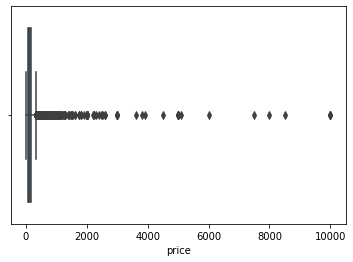

In [41]:
sns.boxplot(x = data['price'])

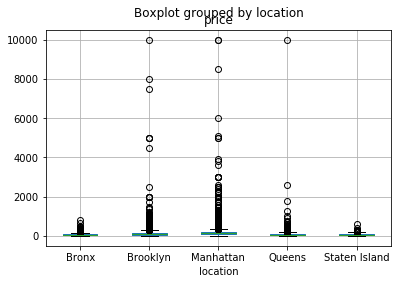

In [42]:
data.boxplot(column = 'price', by = 'location')

In [43]:
for d in range(data['price'].size):
    if data['price'][d] >= 10000:
        print(str(data.iloc[d]) + "\n\n")

id                                               7003697
name                 Furnished room in Astoria apartment
host_id                                         20582832
host_name                                       Kathrine
location                                          Queens
room                                        Private room
price                                              10000
minimum_nights                                       100
reviews                                                2
last_review                                   2016-02-13
reviews_per_month                                   0.04
availability_365                                       0
Name: 8004, dtype: object


id                                                          13894339
name                 Luxury 1 bedroom apt. -stunning Manhattan views
host_id                                                      5143901
host_name                                                       Erin
location    

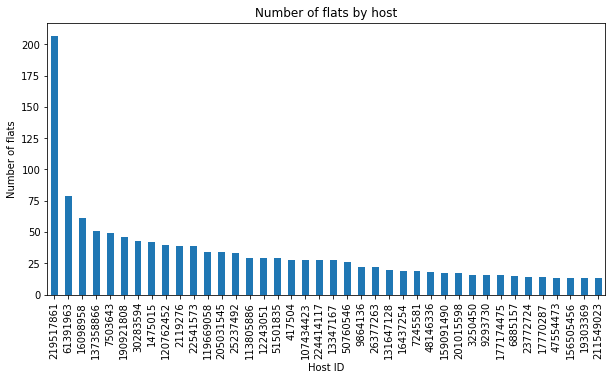

In [44]:
data.host_id.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of flats by host")
plt.ylabel('Number of flats')
plt.xlabel('Host ID');

## Heatmap to check correlation between variables

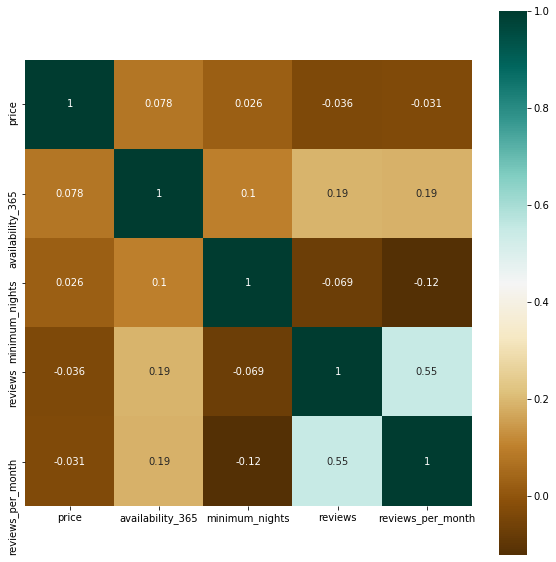

In [45]:
plt.figure(figsize = (10, 10))
c = data[['price', 'availability_365', 'minimum_nights', 'reviews', 'reviews_per_month']]
sns.heatmap(c.corr(), cmap = "BrBG", annot = True, square = True)